In [1]:
import sys
sys.path.insert(0, "../")

import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.datasets import load_iris
from mcfa import (mcfa, mpl_utils, utils)

%matplotlib inline

In [8]:
seed = 42 # for reproducibility

N = 10000
D = 10
J = 3
K = 5

X, truths = utils.simulate_data(N=N, D=D, J=J, K=K, seed=seed, full_output=True)

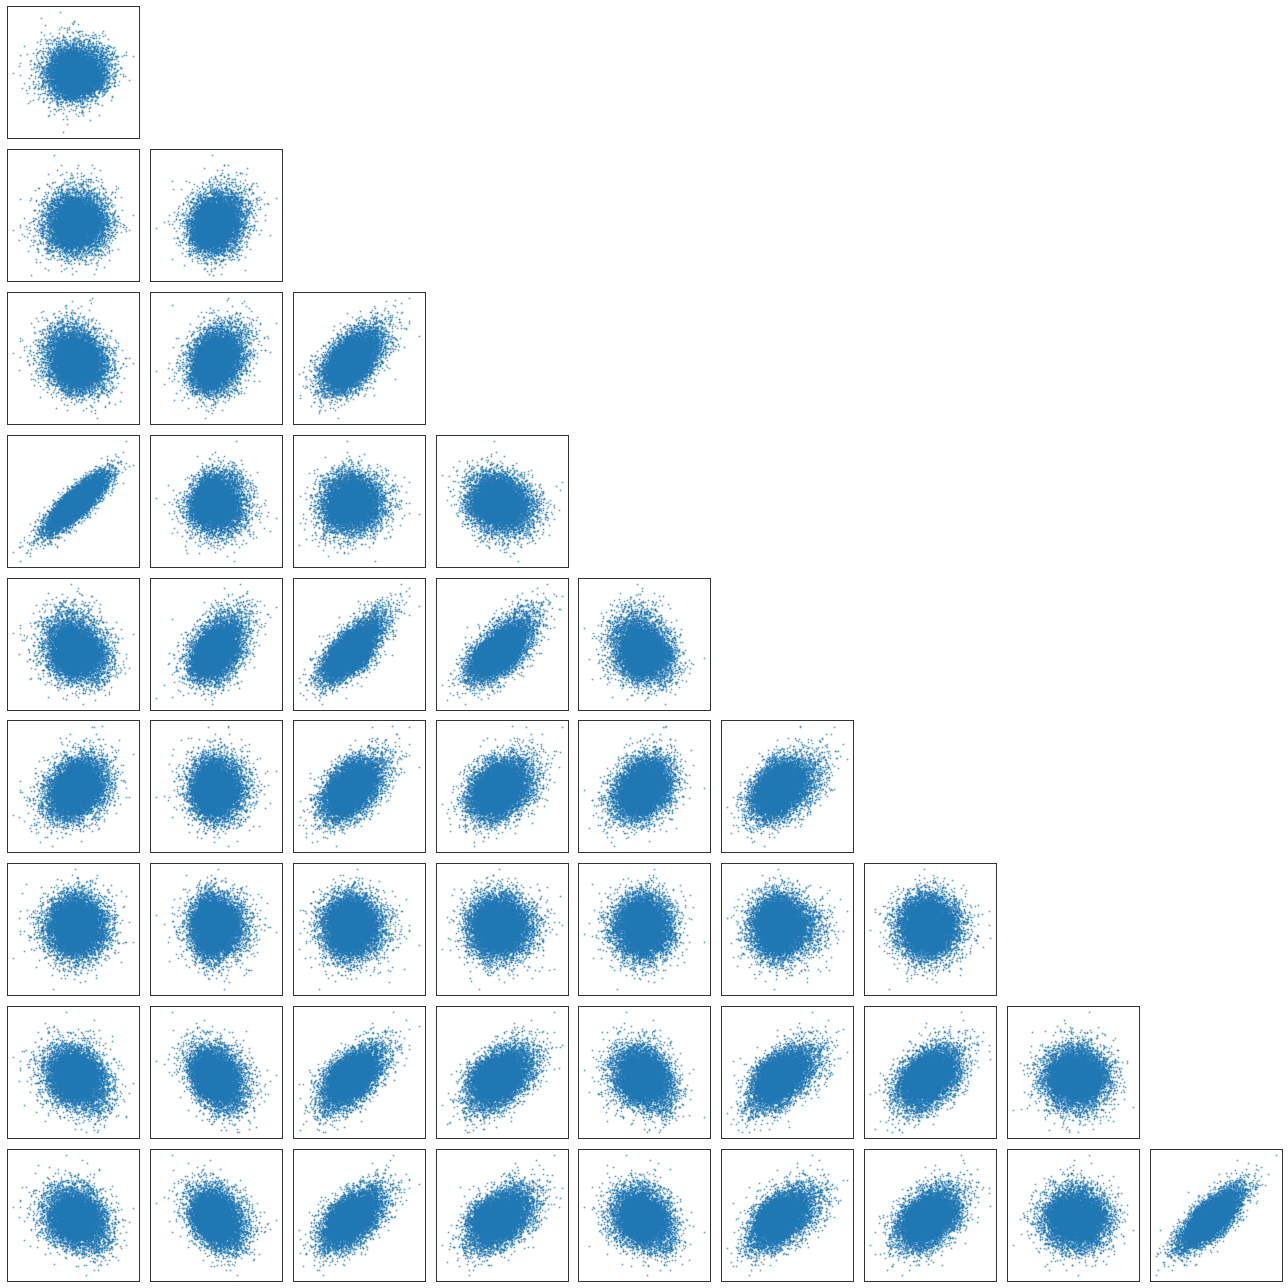

In [9]:
fig = mpl_utils.corner_scatter(X)

In [10]:
model = mcfa.MCFA(n_components=5, n_latent_factors=3)

In [11]:
%timeit model.fit(X, slow=True)

i/0: expectation 9.5e-03 maximisation 1.1e-02 ll -1.5e+05
i/1: expectation 9.8e-03 maximisation 8.5e-03 ll -1.5e+05
i/2: expectation 1.1e-02 maximisation 8.5e-03 ll -1.5e+05
i/3: expectation 1.0e-02 maximisation 8.5e-03 ll -1.4e+05
i/4: expectation 9.6e-03 maximisation 1.1e-02 ll -1.4e+05
i/5: expectation 9.6e-03 maximisation 8.5e-03 ll -1.4e+05
i/6: expectation 1.0e-02 maximisation 8.5e-03 ll -1.4e+05
i/7: expectation 1.0e-02 maximisation 8.6e-03 ll -1.4e+05
i/8: expectation 9.4e-03 maximisation 1.1e-02 ll -1.4e+05
i/9: expectation 1.1e-02 maximisation 1.2e-02 ll -1.4e+05
i/10: expectation 1.0e-02 maximisation 8.8e-03 ll -1.4e+05
i/11: expectation 1.2e-02 maximisation 2.1e-02 ll -1.4e+05
i/12: expectation 1.0e-02 maximisation 8.6e-03 ll -1.4e+05
i/13: expectation 9.7e-03 maximisation 9.2e-03 ll -1.4e+05
i/14: expectation 9.4e-03 maximisation 1.3e-02 ll -1.4e+05
i/15: expectation 9.7e-03 maximisation 8.6e-03 ll -1.4e+05
i/16: expectation 1.0e-02 maximisation 8.5e-03 ll -1.4e+05
i/17: e

i/20: expectation 1.2e-02 maximisation 8.9e-03 ll -1.4e+05
i/21: expectation 9.4e-03 maximisation 8.9e-03 ll -1.4e+05
i/22: expectation 9.8e-03 maximisation 8.7e-03 ll -1.4e+05
i/23: expectation 1.3e-02 maximisation 9.0e-03 ll -1.4e+05
i/24: expectation 1.2e-02 maximisation 1.6e-02 ll -1.4e+05
i/25: expectation 1.1e-02 maximisation 9.1e-03 ll -1.4e+05
i/26: expectation 9.8e-03 maximisation 1.0e-02 ll -1.4e+05
i/27: expectation 1.0e-02 maximisation 1.6e-02 ll -1.4e+05
i/28: expectation 1.3e-02 maximisation 1.4e-02 ll -1.4e+05
i/29: expectation 1.3e-02 maximisation 1.0e-02 ll -1.4e+05
i/30: expectation 1.1e-02 maximisation 1.3e-02 ll -1.4e+05
i/31: expectation 1.4e-02 maximisation 1.0e-02 ll -1.4e+05
i/32: expectation 1.3e-02 maximisation 9.1e-03 ll -1.4e+05
i/33: expectation 1.1e-02 maximisation 9.0e-03 ll -1.4e+05
i/34: expectation 9.9e-03 maximisation 9.5e-03 ll -1.4e+05
i/35: expectation 1.2e-02 maximisation 8.8e-03 ll -1.4e+05
i/36: expectation 1.1e-02 maximisation 8.7e-02 ll -1.4e+

i/40: expectation 9.5e-03 maximisation 2.1e-02 ll -1.4e+05
i/41: expectation 2.0e-02 maximisation 9.9e-03 ll -1.4e+05
i/0: expectation 1.0e-02 maximisation 7.6e-03 ll -1.5e+05
i/1: expectation 8.4e-03 maximisation 6.9e-03 ll -1.5e+05
i/2: expectation 1.1e-02 maximisation 5.6e-02 ll -1.5e+05
i/3: expectation 9.6e-03 maximisation 1.5e-02 ll -1.4e+05
i/4: expectation 9.5e-03 maximisation 1.5e-02 ll -1.4e+05
i/5: expectation 9.5e-03 maximisation 8.7e-03 ll -1.4e+05
i/6: expectation 1.2e-02 maximisation 1.3e-02 ll -1.4e+05
i/7: expectation 1.1e-02 maximisation 8.7e-03 ll -1.4e+05
i/8: expectation 1.4e-02 maximisation 1.1e-02 ll -1.4e+05
i/9: expectation 1.0e-02 maximisation 1.0e-02 ll -1.4e+05
i/10: expectation 1.1e-02 maximisation 1.0e-02 ll -1.4e+05
i/11: expectation 1.1e-02 maximisation 9.4e-03 ll -1.4e+05
i/12: expectation 9.9e-03 maximisation 9.2e-03 ll -1.4e+05
i/13: expectation 9.9e-03 maximisation 9.4e-03 ll -1.4e+05
i/14: expectation 1.0e-02 maximisation 8.9e-03 ll -1.4e+05
i/15: e

i/10: expectation 1.1e-02 maximisation 8.7e-03 ll -1.4e+05
i/11: expectation 1.3e-02 maximisation 1.4e-02 ll -1.4e+05
i/12: expectation 1.1e-02 maximisation 8.8e-03 ll -1.4e+05
i/13: expectation 1.3e-02 maximisation 8.8e-03 ll -1.4e+05
i/14: expectation 1.1e-02 maximisation 8.8e-03 ll -1.4e+05
i/15: expectation 1.2e-02 maximisation 8.8e-03 ll -1.4e+05
i/16: expectation 1.4e-02 maximisation 9.3e-03 ll -1.4e+05
i/17: expectation 1.0e-02 maximisation 9.5e-03 ll -1.4e+05
i/18: expectation 9.7e-03 maximisation 1.0e-02 ll -1.4e+05
i/19: expectation 1.0e-02 maximisation 8.6e-03 ll -1.4e+05
i/20: expectation 1.2e-02 maximisation 2.1e-02 ll -1.4e+05
i/21: expectation 9.8e-03 maximisation 1.1e-02 ll -1.4e+05
i/22: expectation 9.9e-03 maximisation 9.7e-03 ll -1.4e+05
i/23: expectation 1.1e-02 maximisation 8.9e-03 ll -1.4e+05
i/24: expectation 1.0e-02 maximisation 9.3e-03 ll -1.4e+05
i/25: expectation 9.7e-03 maximisation 1.1e-02 ll -1.4e+05
i/26: expectation 9.8e-03 maximisation 8.7e-03 ll -1.4e+

i/32: expectation 9.8e-03 maximisation 1.1e-02 ll -1.4e+05
i/33: expectation 2.5e-02 maximisation 1.5e-02 ll -1.4e+05
i/34: expectation 1.0e-02 maximisation 9.4e-03 ll -1.4e+05
i/35: expectation 9.9e-03 maximisation 1.1e-02 ll -1.4e+05
i/36: expectation 9.7e-03 maximisation 1.0e-02 ll -1.4e+05
i/37: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/38: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/39: expectation 9.5e-03 maximisation 9.6e-03 ll -1.4e+05
i/40: expectation 9.7e-03 maximisation 8.6e-03 ll -1.4e+05
i/41: expectation 1.0e-02 maximisation 8.6e-03 ll -1.4e+05
i/0: expectation 9.5e-03 maximisation 1.1e-02 ll -1.5e+05
i/1: expectation 9.7e-03 maximisation 8.6e-03 ll -1.5e+05
i/2: expectation 1.0e-02 maximisation 8.6e-03 ll -1.5e+05
i/3: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/4: expectation 9.6e-03 maximisation 1.0e-02 ll -1.4e+05
i/5: expectation 9.8e-03 maximisation 8.6e-03 ll -1.4e+05
i/6: expectation 9.9e-03 maximisation 1.2e-02 ll -1.4e+05
i/7:

i/10: expectation 9.8e-03 maximisation 2.3e-02 ll -1.4e+05
i/11: expectation 1.3e-02 maximisation 1.3e-02 ll -1.4e+05
i/12: expectation 1.0e-02 maximisation 1.1e-02 ll -1.4e+05
i/13: expectation 1.2e-02 maximisation 1.0e-02 ll -1.4e+05
i/14: expectation 1.1e-02 maximisation 1.0e-02 ll -1.4e+05
i/15: expectation 1.0e-02 maximisation 3.2e-02 ll -1.4e+05
i/16: expectation 1.2e-02 maximisation 7.3e-03 ll -1.4e+05
i/17: expectation 9.4e-03 maximisation 9.7e-03 ll -1.4e+05
i/18: expectation 1.0e-02 maximisation 8.7e-03 ll -1.4e+05
i/19: expectation 1.3e-02 maximisation 2.0e-02 ll -1.4e+05
i/20: expectation 1.3e-02 maximisation 1.2e-02 ll -1.4e+05
i/21: expectation 1.1e-02 maximisation 8.9e-03 ll -1.4e+05
i/22: expectation 1.0e-02 maximisation 8.7e-03 ll -1.4e+05
i/23: expectation 1.1e-02 maximisation 8.7e-03 ll -1.4e+05
i/24: expectation 1.0e-02 maximisation 9.2e-03 ll -1.4e+05
i/25: expectation 9.8e-03 maximisation 1.0e-02 ll -1.4e+05
i/26: expectation 9.6e-03 maximisation 8.5e-03 ll -1.4e+

i/30: expectation 9.9e-03 maximisation 2.0e-02 ll -1.4e+05
i/31: expectation 1.2e-02 maximisation 1.5e-02 ll -1.4e+05
i/32: expectation 1.2e-02 maximisation 8.7e-03 ll -1.4e+05
i/33: expectation 1.2e-02 maximisation 8.8e-03 ll -1.4e+05
i/34: expectation 1.5e-02 maximisation 9.4e-03 ll -1.4e+05
i/35: expectation 9.6e-03 maximisation 1.0e-02 ll -1.4e+05
i/36: expectation 9.7e-03 maximisation 8.5e-03 ll -1.4e+05
i/37: expectation 1.2e-02 maximisation 8.6e-03 ll -1.4e+05
i/38: expectation 1.2e-02 maximisation 8.6e-03 ll -1.4e+05
i/39: expectation 1.1e-02 maximisation 1.0e-02 ll -1.4e+05
i/40: expectation 1.9e-02 maximisation 8.8e-03 ll -1.4e+05
i/41: expectation 1.4e-02 maximisation 8.6e-03 ll -1.4e+05
i/0: expectation 7.4e-03 maximisation 6.1e-03 ll -1.5e+05
i/1: expectation 9.0e-03 maximisation 8.6e-03 ll -1.5e+05
i/2: expectation 9.6e-03 maximisation 1.1e-02 ll -1.5e+05
i/3: expectation 9.8e-03 maximisation 8.6e-03 ll -1.4e+05
i/4: expectation 1.2e-02 maximisation 8.8e-03 ll -1.4e+05
i/

i/11: expectation 1.3e-02 maximisation 1.4e-02 ll -1.4e+05
i/12: expectation 1.3e-02 maximisation 1.0e-02 ll -1.4e+05
i/13: expectation 9.9e-03 maximisation 9.6e-03 ll -1.4e+05
i/14: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/15: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/16: expectation 9.8e-03 maximisation 9.3e-03 ll -1.4e+05
i/17: expectation 9.6e-03 maximisation 8.6e-03 ll -1.4e+05
i/18: expectation 1.0e-02 maximisation 8.5e-03 ll -1.4e+05
i/19: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/20: expectation 9.5e-03 maximisation 1.2e-02 ll -1.4e+05
i/21: expectation 9.6e-03 maximisation 1.0e-02 ll -1.4e+05
i/22: expectation 1.1e-02 maximisation 2.0e-02 ll -1.4e+05
i/23: expectation 1.3e-02 maximisation 1.2e-02 ll -1.4e+05
i/24: expectation 1.2e-02 maximisation 9.1e-03 ll -1.4e+05
i/25: expectation 1.1e-02 maximisation 8.7e-03 ll -1.4e+05
i/26: expectation 1.1e-02 maximisation 9.0e-03 ll -1.4e+05
i/27: expectation 1.0e-02 maximisation 1.1e-02 ll -1.4e+

i/28: expectation 9.4e-03 maximisation 2.1e-02 ll -1.4e+05
i/29: expectation 1.2e-02 maximisation 8.7e-03 ll -1.4e+05
i/30: expectation 1.0e-02 maximisation 1.0e-02 ll -1.4e+05
i/31: expectation 1.0e-02 maximisation 8.7e-03 ll -1.4e+05
i/32: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/33: expectation 1.1e-02 maximisation 8.8e-03 ll -1.4e+05
i/34: expectation 1.6e-02 maximisation 9.7e-03 ll -1.4e+05
i/35: expectation 1.1e-02 maximisation 9.0e-03 ll -1.4e+05
i/36: expectation 1.1e-02 maximisation 1.0e-02 ll -1.4e+05
i/37: expectation 1.0e-02 maximisation 8.7e-03 ll -1.4e+05
i/38: expectation 1.9e-02 maximisation 1.3e-02 ll -1.4e+05
i/39: expectation 1.0e-02 maximisation 1.1e-02 ll -1.4e+05
i/40: expectation 1.1e-02 maximisation 8.8e-03 ll -1.4e+05
i/41: expectation 1.2e-02 maximisation 8.7e-03 ll -1.4e+05
i/0: expectation 9.7e-03 maximisation 1.2e-02 ll -1.5e+05
i/1: expectation 9.6e-03 maximisation 1.6e-02 ll -1.5e+05
i/2: expectation 1.0e-02 maximisation 1.1e-02 ll -1.5e+05


i/38: expectation 1.5e-02 maximisation 1.8e-02 ll -1.4e+05
i/39: expectation 9.9e-03 maximisation 1.0e-02 ll -1.4e+05
i/40: expectation 1.1e-02 maximisation 8.8e-03 ll -1.4e+05
i/41: expectation 9.6e-03 maximisation 1.0e-02 ll -1.4e+05
i/0: expectation 1.1e-02 maximisation 8.6e-03 ll -1.5e+05
i/1: expectation 1.0e-02 maximisation 9.5e-03 ll -1.5e+05
i/2: expectation 9.5e-03 maximisation 1.2e-02 ll -1.5e+05
i/3: expectation 9.8e-03 maximisation 8.5e-03 ll -1.4e+05
i/4: expectation 1.1e-02 maximisation 8.5e-03 ll -1.4e+05
i/5: expectation 1.0e-02 maximisation 1.0e-02 ll -1.4e+05
i/6: expectation 1.0e-02 maximisation 8.9e-03 ll -1.4e+05
i/7: expectation 1.1e-02 maximisation 8.7e-03 ll -1.4e+05
i/8: expectation 1.0e-02 maximisation 8.5e-03 ll -1.4e+05
i/9: expectation 1.1e-02 maximisation 8.5e-03 ll -1.4e+05
i/10: expectation 9.6e-03 maximisation 9.9e-03 ll -1.4e+05
i/11: expectation 1.3e-02 maximisation 1.1e-02 ll -1.4e+05
i/12: expectation 1.1e-02 maximisation 9.9e-03 ll -1.4e+05
i/13: e

i/19: expectation 1.1e-02 maximisation 4.1e-02 ll -1.4e+05
i/20: expectation 1.1e-02 maximisation 1.2e-02 ll -1.4e+05
i/21: expectation 1.1e-02 maximisation 9.0e-03 ll -1.4e+05
i/22: expectation 2.7e-02 maximisation 1.0e-02 ll -1.4e+05
i/23: expectation 9.7e-03 maximisation 8.6e-03 ll -1.4e+05
i/24: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/25: expectation 1.3e-02 maximisation 8.8e-03 ll -1.4e+05
i/26: expectation 1.2e-02 maximisation 9.3e-03 ll -1.4e+05
i/27: expectation 9.5e-03 maximisation 1.0e-02 ll -1.4e+05
i/28: expectation 9.7e-03 maximisation 1.1e-02 ll -1.4e+05
i/29: expectation 1.3e-02 maximisation 8.6e-03 ll -1.4e+05
i/30: expectation 1.3e-02 maximisation 9.1e-03 ll -1.4e+05
i/31: expectation 1.0e-02 maximisation 1.0e-02 ll -1.4e+05
i/32: expectation 9.6e-03 maximisation 1.1e-02 ll -1.4e+05
i/33: expectation 9.7e-03 maximisation 8.6e-03 ll -1.4e+05
i/34: expectation 1.1e-02 maximisation 1.1e-02 ll -1.4e+05
i/35: expectation 1.3e-02 maximisation 8.6e-03 ll -1.4e+

i/40: expectation 1.2e-02 maximisation 1.4e-02 ll -1.4e+05
i/41: expectation 1.1e-02 maximisation 9.6e-03 ll -1.4e+05
i/42: expectation 1.2e-02 maximisation 8.6e-03 ll -1.4e+05
i/43: expectation 1.1e-02 maximisation 1.3e-02 ll -1.4e+05
i/0: expectation 1.2e-02 maximisation 1.1e-02 ll -1.5e+05
i/1: expectation 1.1e-02 maximisation 8.6e-03 ll -1.5e+05
i/2: expectation 1.3e-02 maximisation 3.8e-02 ll -1.5e+05
i/3: expectation 1.0e-02 maximisation 9.3e-03 ll -1.4e+05
i/4: expectation 9.8e-03 maximisation 1.0e-02 ll -1.4e+05
i/5: expectation 9.7e-03 maximisation 9.3e-03 ll -1.4e+05
i/6: expectation 1.1e-02 maximisation 8.7e-03 ll -1.4e+05
i/7: expectation 9.8e-03 maximisation 8.3e-03 ll -1.4e+05
i/8: expectation 1.0e-02 maximisation 4.7e-02 ll -1.4e+05
i/9: expectation 9.9e-03 maximisation 9.5e-03 ll -1.4e+05
i/10: expectation 9.5e-03 maximisation 9.6e-03 ll -1.4e+05
i/11: expectation 1.3e-02 maximisation 1.3e-02 ll -1.4e+05
i/12: expectation 2.6e-02 maximisation 2.0e-02 ll -1.4e+05
i/13: e

In [12]:
from time import time
t_init = time()
model.fit(X)
print("elapsed: {}".format(time() - t_init))

i/0: expectation 1.0e-02 maximisation 9.3e-03 ll -1.5e+05
i/1: expectation 9.8e-03 maximisation 8.6e-03 ll -1.5e+05
i/2: expectation 1.0e-02 maximisation 8.8e-03 ll -1.5e+05
i/3: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/4: expectation 9.6e-03 maximisation 9.8e-03 ll -1.4e+05
i/5: expectation 9.7e-03 maximisation 8.6e-03 ll -1.4e+05
i/6: expectation 1.0e-02 maximisation 8.6e-03 ll -1.4e+05
i/7: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/8: expectation 9.7e-03 maximisation 9.6e-03 ll -1.4e+05
i/9: expectation 9.7e-03 maximisation 8.7e-03 ll -1.4e+05
i/10: expectation 1.0e-02 maximisation 8.6e-03 ll -1.4e+05
i/11: expectation 1.3e-02 maximisation 2.0e-02 ll -1.4e+05
i/12: expectation 9.8e-03 maximisation 1.0e-02 ll -1.4e+05
i/13: expectation 1.1e-02 maximisation 8.6e-03 ll -1.4e+05
i/14: expectation 1.1e-02 maximisation 8.8e-03 ll -1.4e+05
i/15: expectation 9.5e-03 maximisation 1.0e-02 ll -1.4e+05
i/16: expectation 9.7e-03 maximisation 8.6e-03 ll -1.4e+05
i/17: e

i/21: expectation 1.4e-02 maximisation 1.5e-02 ll -1.4e+05
i/22: expectation 1.4e-02 maximisation 9.0e-03 ll -1.4e+05
i/23: expectation 1.5e-02 maximisation 1.0e-02 ll -1.4e+05
i/24: expectation 1.2e-02 maximisation 8.9e-03 ll -1.4e+05
i/25: expectation 9.9e-03 maximisation 1.1e-02 ll -1.4e+05
i/26: expectation 1.0e-02 maximisation 1.0e-02 ll -1.4e+05
i/27: expectation 1.0e-02 maximisation 8.6e-03 ll -1.4e+05
i/28: expectation 1.2e-02 maximisation 1.0e-02 ll -1.4e+05
i/29: expectation 1.5e-02 maximisation 8.8e-03 ll -1.4e+05
i/30: expectation 1.2e-02 maximisation 9.0e-03 ll -1.4e+05
i/31: expectation 1.9e-02 maximisation 8.7e-03 ll -1.4e+05
i/32: expectation 1.3e-02 maximisation 8.7e-03 ll -1.4e+05
i/33: expectation 1.1e-02 maximisation 1.0e-02 ll -1.4e+05
i/34: expectation 9.7e-03 maximisation 1.0e-02 ll -1.4e+05
i/35: expectation 1.1e-02 maximisation 1.3e-02 ll -1.4e+05
i/36: expectation 1.1e-02 maximisation 8.7e-03 ll -1.4e+05
i/37: expectation 1.3e-02 maximisation 8.8e-03 ll -1.4e+

In [13]:
%timeit model._expectation(X, *model.theta_)

2.03 s ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit model.expectation(X, *model.theta_)

9.82 ms ± 173 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
2.03/

In [ ]:
seed = 42 # for reproducibility

D = 10
J = 3
K = 5

model = mcfa.MCFA(n_components=K, n_latent_factors=J,
                  n_init=1, n_random_init=0)

lower, upper = 3, 4
count = 10

Ns = np.logspace(lower, upper, count).astype(int)
costs = np.zeros(Ns.shape, dtype=float)

for i, N in enumerate(Ns):
    ta = time()
    X, truths = utils.simulate_data(N=N, D=D, J=J, K=K, seed=seed, full_output=True)
    
    t_simulate = time() - ta
    
    ta = time()
    model.fit(X)
    t_fit = time() - ta
    
    print("{}: {:.0f} s to generate; {:.0f} s to fit; ll = {:.0f}".format(
         N, t_simulate, t_fit, model.log_likelihood_))
    
    costs[i] = t_fit

In [ ]:
# Go harder
Ns = np.hstack([Ns, np.logspace(4, 5, count).astype(int)])
costs = np.hstack([costs, np.zeros(Ns.size - costs.size)])


In [ ]:
print(Ns)
print(costs)
print(Ns.size, costs.size)

In [ ]:
for i, N in enumerate(Ns):
    if costs[i] > 0: continue
        
    ta = time()
    X, truths = utils.simulate_data(N=N, D=D, J=J, K=K, seed=seed, full_output=True)
    
    t_simulate = time() - ta
    
    ta = time()
    model.fit(X)
    t_fit = time() - ta
    
    print("{}: {:.0f} s to generate; {:.0f} s to fit; ll = {:.0f}".format(
         N, t_simulate, t_fit, model.log_likelihood_))
    
    costs[i] = t_fit

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Ns, costs)
ax.semilogy()
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"\textrm{cost / seconds}")
ax.semilogx()

In [ ]:
# 10,000 data points with 10 dimensions costs about two minutes
